# Training logistic Regression classifier


In [ ]:
import pvml
import build_vocabulary as bv
import features_extraction as fe
import pandas as pd
import make_statistics as ms

voc = bv.get_vocabulary(path='../dataset/', numWords=1000, save=False)
X_train, Y_train = fe.get_bow_representation(voc)
X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                             clickbait_path='../dataset/clickbait_validation.txt', save=False, stemming=False)

learning_rates = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03]
validation_accuracy = []
validation_precision = []
train_accuracy = []


for lr in learning_rates:
    w, b = pvml.logreg_train(
        X_train, Y_train, lambda_=0.00001, lr=lr, steps=1000, init_w=None, init_b=0)

    P = pvml.logreg_inference(X_train, w, b)
    prediction = (P > 0.5)
    accuracy_train = (prediction == Y_train).mean()

    P = pvml.logreg_inference(X_valid, w, b)
    prediction = (P > 0.5)
    accuracy_validation = (prediction == Y_valid).mean()

    true_positives, true_negatives, false_positives, false_negatives, precision = ms.calculate_metrics(
        Y_valid, prediction)

    print('Lambda: ', lr)
    print('Accuracy: ', accuracy_train*100)

    validation_accuracy.append(accuracy_validation*100)
    validation_precision.append(precision*100)
    train_accuracy.append(accuracy_train*100)

results = pd.DataFrame({'Learning rates': learning_rates,
                       'Validation accuracy': validation_accuracy, 'Validation precision': validation_precision})
results.to_csv('../data/logistic_diff_lr.csv')

<Axes: title={'center': 'Comparison of different learning rates'}, xlabel='Learning rates', ylabel='Percentage (%)'>

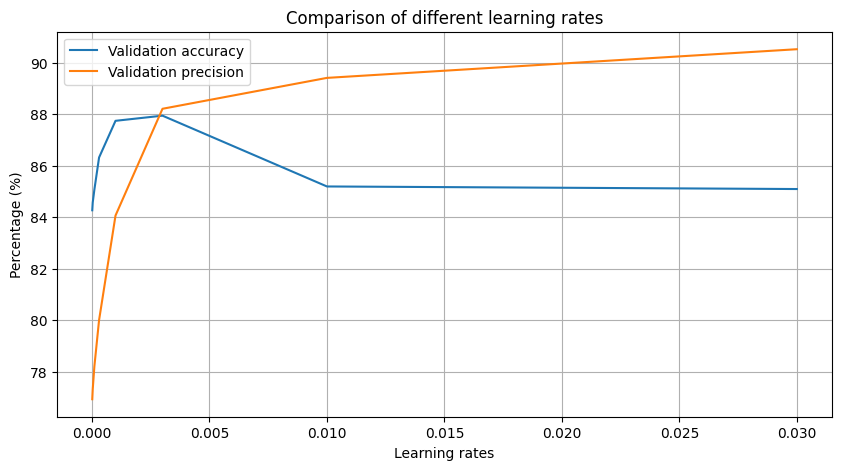

In [6]:
import pandas as pd
data = pd.read_csv('../data/logistic_diff_lr.csv')
data.plot(kind='line', x='Learning rates', y=['Validation accuracy', 'Validation precision'], figsize=(10, 5), grid=True,
          title='Comparison of different learning rates', ylabel='Percentage (%)')

# Comparing different vocabulary size


In [ ]:
import pvml
import build_vocabulary as bv
import features_extraction as fe
import pandas as pd
import make_statistics as ms

validation_accuracy = []
validation_precision = []
train_accuracy = []
vocabulary_size = []

for voc_size in range(1000, 10001, 1000):
    voc = bv.get_vocabulary(path='../dataset/', numWords=voc_size, save=False)
    X_train, Y_train = fe.get_bow_representation(voc)
    X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                                 clickbait_path='../dataset/clickbait_validation.txt', save=False, stemming=False)
    w, b = pvml.logreg_train(
        X_train, Y_train, lambda_=0.00001, lr=0.003, steps=1000, init_w=None, init_b=0)

    P = pvml.logreg_inference(X_train, w, b)
    prediction = (P > 0.5)
    accuracy_train = (prediction == Y_train).mean()

    P = pvml.logreg_inference(X_valid, w, b)
    prediction = (P > 0.5)
    accuracy_validation = (prediction == Y_valid).mean()

    true_positives, true_negatives, false_positives, false_negatives, precision = ms.calculate_metrics(
        Y_valid, prediction)

    print('Size: ', voc_size)
    print('Accuracy: ', accuracy_train*100)

    validation_accuracy.append(accuracy_validation*100)
    validation_precision.append(precision*100)
    train_accuracy.append(accuracy_train*100)
    vocabulary_size.append(voc_size)

results = pd.DataFrame({'Vocabulary size': vocabulary_size,
                       'Validation accuracy': validation_accuracy, 'Validation precision': validation_precision, 'Train accuracy': train_accuracy})
results.to_csv('../data/logistic_diff_voc_size.csv')

<Axes: title={'center': 'Comparison of different vocabulary sizes'}, xlabel='Vocabulary size', ylabel='Percentage (%)'>

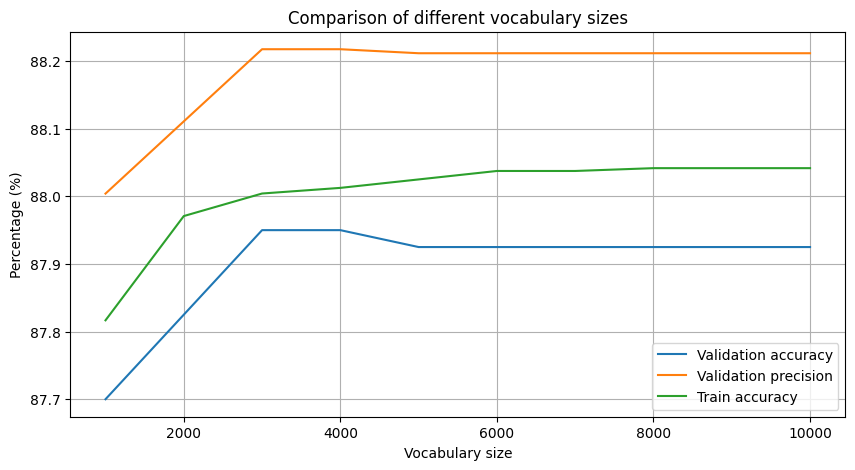

In [12]:
import pandas as pd

data = pd.read_csv('../data/logistic_diff_voc_size.csv')
data.plot(kind='line', x='Vocabulary size', y=['Validation accuracy', 'Validation precision', 'Train accuracy'], figsize=(10, 5), grid=True,
          title='Comparison of different vocabulary sizes', ylabel='Percentage (%)')

# Logistic regression without most common words


In [16]:
import pvml
import build_vocabulary as bv
import features_extraction as fe
import pandas as pd
import make_statistics as ms


words_to_ignore = []
f = open('../data/stopwords.txt', 'r')
n = 0
for w in f.read().split():
    words_to_ignore.append(w)
    n += 1
f.close()

voc_no_common_words = [word for word in voc if word not in words_to_ignore]

voc = bv.get_vocabulary(path='../dataset/', numWords=3000, save=False)
X_train, Y_train = fe.get_bow_representation(voc_no_common_words)
X_valid, Y_valid = fe.get_bow_representation(voc_no_common_words, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                             clickbait_path='../dataset/clickbait_validation.txt', save=False, stemming=False)
w, b = pvml.logreg_train(
    X_train, Y_train, lambda_=0.00001, lr=0.003, steps=1000, init_w=None, init_b=0)

P = pvml.logreg_inference(X_train, w, b)
prediction = (P > 0.5)
accuracy_train = (prediction == Y_train).mean()

P = pvml.logreg_inference(X_valid, w, b)
prediction = (P > 0.5)
accuracy_validation = (prediction == Y_valid).mean()

true_positives, true_negatives, false_positives, false_negatives, precision = ms.calculate_metrics(
    Y_valid, prediction)

print('Train accuracy: ', accuracy_train*100)
print('Validation accuracy: ', accuracy_validation*100)
print('Validation precision: ', precision*100)

Train accuracy:  90.4125
Validation accuracy:  89.2
Validation precision:  92.0150053590568


# Logistic regression with stemming


In [17]:
import pvml
import build_vocabulary as bv
import features_extraction as fe
import pandas as pd
import make_statistics as ms


voc = bv.get_vocabulary(path='../dataset/', numWords=3000, save=False)
X_train, Y_train = fe.get_bow_representation(voc, stemming=True)
X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                             clickbait_path='../dataset/clickbait_validation.txt', save=False, stemming=True)
w, b = pvml.logreg_train(
    X_train, Y_train, lambda_=0.00001, lr=0.003, steps=1000, init_w=None, init_b=0)

P = pvml.logreg_inference(X_train, w, b)
prediction = (P > 0.5)
accuracy_train = (prediction == Y_train).mean()

P = pvml.logreg_inference(X_valid, w, b)
prediction = (P > 0.5)
accuracy_validation = (prediction == Y_valid).mean()

true_positives, true_negatives, false_positives, false_negatives, precision = ms.calculate_metrics(
    Y_valid, prediction)

print('Train accuracy: ', accuracy_train*100)
print('Validation accuracy: ', accuracy_validation*100)
print('Validation precision: ', precision*100)

Train accuracy:  88.50833333333334
Validation accuracy:  88.425
Validation precision:  88.02572983671449


# Find the optimal number of iterations


In [1]:
import pvml
import build_vocabulary as bv
import features_extraction as fe
import pandas as pd
import make_statistics as ms
import logistic_regression as lr


words_to_ignore = []
f = open('../data/stopwords.txt', 'r')
n = 0
for w in f.read().split():
    words_to_ignore.append(w)
    n += 1
f.close()

voc = bv.get_vocabulary(path='../dataset/', numWords=3000, save=False)

voc_no_common_words = [word for word in voc if word not in words_to_ignore]

X_train, Y_train = fe.get_bow_representation(voc_no_common_words)
X_valid, Y_valid = fe.get_bow_representation(voc_no_common_words, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                             clickbait_path='../dataset/clickbait_validation.txt', save=False, stemming=False)


w, b, accuracy_valid,accuracy_train  = lr.logreg_train(
    X_train, Y_train, X_valid, Y_valid, steps=20000, lr=0.003, lambda_=0.00001)
iterations = range(0, 20001, 1000)
results = pd.DataFrame({'Iterations': iterations, 'Train accuracy': accuracy_train,
                       'Validation accuracy': accuracy_valid})
results.to_csv('../data/logistic_diff_iterations.csv')

step 0, accuracy 0.5000
step 1000, accuracy 0.9290
step 2000, accuracy 0.9265
step 3000, accuracy 0.9230
step 4000, accuracy 0.9210
step 5000, accuracy 0.9197
step 6000, accuracy 0.9195
step 7000, accuracy 0.9190


KeyboardInterrupt: 